## Exercise 1: Linear Regression
### ==================== Part 1: Basic Function ====================

In [1]:
from ex1 import *
print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')
warmUpExercise()

Running warmUpExercise ... 
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### ======================= Part 2: Plotting =======================

Plotting Data ...


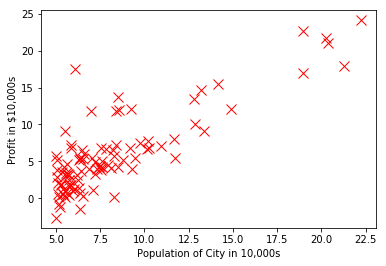

In [2]:
print('Plotting Data ...')
import pandas as pd
data = pd.read_csv('ex1data1.txt', header=None)
X = data.iloc[:, 0]
y = data.iloc[:, 1]
m = len(y) # number of training examples

# Plot Data
plotData(X, y)

### =================== Part 3: Cost and Gradient descent ===================
代价函数$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}{\left(h_\theta(x^{(i)}) - y^{(i)}\right)^2} = \frac{1}{2m}\left((X\theta - y)^T(X\theta - y)\right)$$

In [3]:
X = pd.DataFrame(data.iloc[:, 0])
X.insert(0, None, 1) # Add a column of ones to x
X = np.array(X)
y = np.array(pd.DataFrame(data.iloc[:, 1]))
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print('Testing the cost function ...')
# compute and display initial cost
J = computeCost(X, y, theta)
print(f'With theta = [0 ; 0]\nCost computed = {J}')
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.array([[-1], [2]]))
print(f'\nWith theta = [-1 ; 2]\nCost computed = {J}')
print('Expected cost value (approx) 54.24')

Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


梯度下降$$\theta_j = \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta) = \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)}) - y^{(i)}\right)\cdot x_j^{(i)} = \theta_j - \alpha\frac{1}{m}(X\theta - y)^TX_j$$
$$\theta = \theta - \alpha\frac{1}{m}\left(X^T(X\theta - y)\right)$$

Running Gradient Descent ...
Theta found by gradient descent:
[[-3.630291]
 [ 1.166362]]
Expected theta values (approx)
 -3.6303
  1.1664



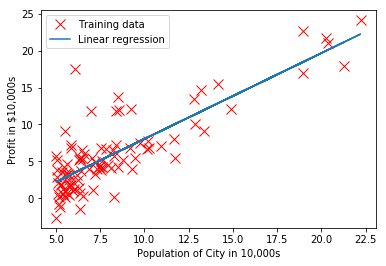

For population = 35,000, we predict a profit of [4519.767868]
For population = 70,000, we predict a profit of [45342.450129]


In [4]:
print('Running Gradient Descent ...')
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print(f'Theta found by gradient descent:\n{theta}');
print('Expected theta values (approx)\n -3.6303\n  1.1664\n');

# Plot the linear fit
plotData(X[:, 1], y) # keep previous plot visible
plt.plot(X[:, 1], np.matmul(X, theta), '-')
plt.legend(['Training data', 'Linear regression'])
plt.show() # don't overlay any more plots on this figure

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.matmul(np.array([1, 3.5]), theta)
print(f'For population = 35,000, we predict a profit of {predict1*10000}')
predict2 = np.matmul(np.array([1, 7]), theta)
print(f'For population = 70,000, we predict a profit of {predict2*10000}')

### ============= Part 4: Visualizing J($\theta_0$, $\theta_1$) =============

Visualizing J(theta_0, theta_1) ...


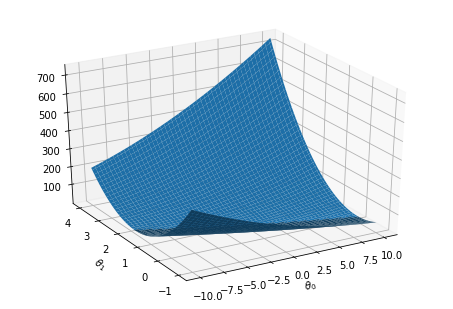

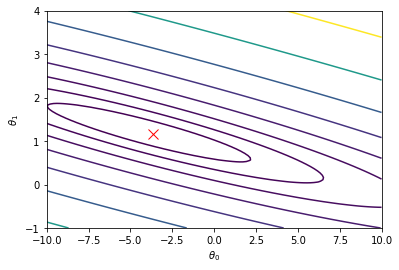

In [5]:
print('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)));

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X, y, t)

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
J_vals = J_vals.transpose()
# Surface plot
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())
ax.view_init(azim=-120)
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0], theta[1], 'rx', MarkerSize=10, LineWidth=2)
plt.show()

###### 以上部分函数代码在[ex1.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex1/ex1.py)中

## Exercise 1: Linear regression with multiple variables
### ================ Part 1: Feature Normalization ================

In [6]:
from ex1_multi import *
print('Loading data ...')

## Load Data
data = pd.read_csv('ex1data2.txt', header=None)
X = data.iloc[:, :2]
y = data.iloc[:, 2]

# Print out some data points
print('First 10 examples from the dataset: ')
for i in range(10):
    print(f' x = [{X.iloc[i, 0]} {X.iloc[i, 1]}], y = {y.iloc[i]} ')

Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


In [7]:
# Scale features and set them to zero mean
print('Normalizing Features ...')

X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X.insert(0, None, 1)

Normalizing Features ...


### ================ Part 2: Gradient Descent ================
`gradientDescentMulti`和`computeCostMulti`方法跟单变量的一模一样，因为已经实现了通用性

Running gradient descent ...


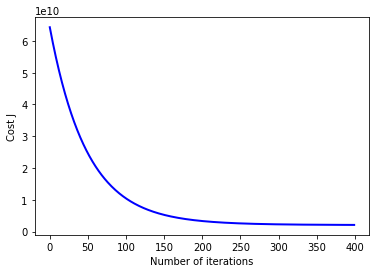

Theta computed from gradient descent: 
 [[334302.063993]
 [ 99411.449474]
 [  3267.012854]] 


In [8]:
print('Running gradient descent ...');

# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
X = np.array(X)
y = np.array(pd.DataFrame(y))
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
from matplotlib import pyplot as plt
plt.plot(np.arange(num_iters), J_history, '-b', LineWidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Display gradient descent's result
print('Theta computed from gradient descent: ');
print(f' {theta} ');

### Selecting learning rates

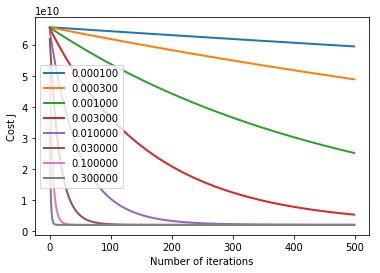

In [9]:
learning_rates = sorted(np.hstack((np.logspace(-4, -1, 4), 3 * np.logspace(-4, -1, 4))))
num_iters = 500
for alpha in learning_rates:
    theta = np.zeros((3, 1))
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
    plt.plot(np.arange(num_iters), J_history, '-', LineWidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend([f'{x:f}' for x in learning_rates])
plt.show()

In [10]:
# Choose some alpha value
alpha = 0.03
num_iters = 400

# Init Theta and Run Gradient Descent 
X = np.array(X)
y = np.array(pd.DataFrame(y))
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Estimate the price of a 1650 sq-ft, 3 br house
house = np.array([[1], [(1650 - mu[0]) / sigma[0]], [(3 - mu[1]) / sigma[1]]])
price = np.asscalar(np.matmul(theta.transpose(), house))


# ============================================================

print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${price:f}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293142.433485


### ================ Part 3: Normal Equations ================
正规方程的解$$\theta = \left(X^TX\right)^{-1}X^Ty$$

In [11]:
## Load Data
data = pd.read_csv('ex1data2.txt', header=None)
X = data.iloc[:, :2]
y = data.iloc[:, 2]
m = len(y)

# Add intercept term to X
X.insert(0, None, 1)

# Calculate the parameters from the normal equation
X = np.array(X)
y = np.array(pd.DataFrame(y))
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: ')
print(f' {theta} \n')


# Estimate the price of a 1650 sq-ft, 3 br house
house = np.array([[1], [1650], [3]])
price = np.asscalar(np.matmul(theta.transpose(), house))


# ============================================================

print(f'Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n {price:f}')

Theta computed from the normal equations: 
 [[89597.909543]
 [  139.210674]
 [-8738.019112]] 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 293081.464335


两种方法的预测结果还是比较相近的。
###### 以上部分函数代码在[ex1_multi.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex1/ex1_multi.py)中
### 总结：`pandas` `numpy` `matplotlib`这几个库结合起来用还是挺方便的，就是需要上手一阵子。